# GDP data

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read data

In [38]:
df_gdp = pd.read_excel(
    "./../../assets/real-GDP.xlsx",
    sheet_name="level GDP",
    header=5,
    skipfooter=5
)

df_gdp


,Period,Unnamed: 1,Unnamed: 2,Unnamed: 3,Q1-1947,Unnamed: 5,Q2-1947,Unnamed: 7,Q3-1947,Unnamed: 9,Q4-1947,Unnamed: 11,Q1-1948,Unnamed: 13,Q2-1948,Unnamed: 15,Q3-1948,Unnamed: 17,Q4-1948,Unnamed: 19,Q1-1949,Unnamed: 21,Q2-1949,Unnamed: 23,Q3-1949,Unnamed: 25,Q4-1949,Unnamed: 27,Q1-1950,Unnamed: 29,Q2-1950,Unnamed: 31,Q3-1950,Unnamed: 33,Q4-1950,Unnamed: 35,Q1-1951,Unnamed: 37,Q2-1951,Unnamed: 39,...,Q1-1997,Unnamed: 405,Q2-1997,Unnamed: 407,Q3-1997,Unnamed: 409,Q4-1997,Unnamed: 411,Q1-1998,Unnamed: 413,Q2-1998,Unnamed: 415,Q3-1998,Unnamed: 417,Q4-1998,Unnamed: 419,Q1-1999,Unnamed: 421,Q2-1999,Unnamed: 423,Q3-1999,Unnamed: 425,Q4-1999,Unnamed: 427,Q1-2000,Unnamed: 429,Q2-2000,Unnamed: 431,Q3-2000,Unnamed: 433,Q4-2000,Unnamed: 435,Q1-2001,Unnamed: 437,Q2-2001,Unnamed: 439,Q3-2001,Unnamed: 441,Q4-2001,Unnamed: 443
0,Country,NaN,Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,NaN,"US Dollar, Millions, 2015",i,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,...,NaN,619682,NaN,638354.6,NaN,639194.6,NaN,648620.4,NaN,652771.8,NaN,659158.1,NaN,671643.4,NaN,682136.9,NaN,687152.7,NaN,689518,NaN,697385.4,NaN,709247.2,NaN,712156.3,NaN,718739.4,NaN,720481.3,NaN,717868.4,NaN,725227.4,NaN,731412.5,NaN,739567.3,NaN,748738.9
2,Austria,NaN,"US Dollar, Millions, 2015",i,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,...,NaN,312190.1,NaN,313157,NaN,317316.4,NaN,320452.1,NaN,322773.5,NaN,326248.6,NaN,328689.4,NaN,329844.2,NaN,331863.9,NaN,336125.5,NaN,341777.5,NaN,342877.4,NaN,346168.8,NaN,348674.5,NaN,350768.5,NaN,355496.1,NaN,354620.9,NaN,353769.1,NaN,354002.5,NaN,355635.8
3,Belgium,NaN,"US Dollar, Millions, 2015",i,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,...,NaN,369801.6,NaN,375521.7,NaN,378831.7,NaN,380941.7,NaN,381931.7,NaN,383201.7,NaN,384321.7,NaN,385181.7,NaN,389206.7,NaN,394531.7,NaN,400261.8,NaN,405001.8,NaN,407881.8,NaN,410816.8,NaN,412721.8,NaN,416756.8,NaN,416991.8,NaN,417066.8,NaN,416271.8,NaN,415856.8
4,Canada,NaN,"US Dollar, Millions, 2015",i,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,...,NaN,1020520.8,NaN,1032005.3,NaN,1044239.7,NaN,1054331.2,NaN,1069218.2,NaN,1069784.4,NaN,1079532.3,NaN,1094159.5,NaN,1113915.1,NaN,1123102.2,NaN,1140706.2,NaN,1156686.8,NaN,1174797.3,NaN,1188624.1,NaN,1200808.2,NaN,1203183.1,NaN,1209955.7,NaN,1213760.9,NaN,1212907.7,NaN,1220182.1
5,Chile,NaN,"US Dollar, Millions, 2015",i,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,...,NaN,195047.1,NaN,199106.4,NaN,203604.2,NaN,207938.2,NaN,209608.6,NaN,213164.3,NaN,211732.5,NaN,204879.3,NaN,204918.6,NaN,205477.7,NaN,209812.3,NaN,215338.9,NaN,217373.4,NaN,217855.3,NaN,221244.9,NaN,223841.5,NaN,225401,NaN,227584.6,NaN,227049.6,NaN,228467.7
6,Colombia,NaN,"US Dollar, Millions, 2015",i,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,...,(E),326653.6,(E),337832.8,(E),340473.8,(E),343532.3,(E),345052.5,(E),345366.2,(E),337260.5,(E),328496.8,(E),324645.9,(E),321815.2,(E),326507.6,(E),326193.5,(E),333382.8,(E),333486.1,(E),335359.7,(E),334932.4,(E),337360,(E),338200.6,(E),340971.1,(E),343065.4
7,Costa Rica,NaN,"US Dollar, Millions, 2015",i,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,...,NaN,38252.4,NaN,39363.5,NaN,39773.8,NaN,41001.4,NaN,4199

In [39]:
#handle weird indent for last ten countries
df_gdp.iloc[-10:,0]   = df_gdp.iloc[-10:,1]

df_gdp.set_index('Period', inplace=True, drop=True)
df_gdp.drop(columns=['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], inplace=True)
df_gdp

,Q1-1947,Unnamed: 5,Q2-1947,Unnamed: 7,Q3-1947,Unnamed: 9,Q4-1947,Unnamed: 11,Q1-1948,Unnamed: 13,Q2-1948,Unnamed: 15,Q3-1948,Unnamed: 17,Q4-1948,Unnamed: 19,Q1-1949,Unnamed: 21,Q2-1949,Unnamed: 23,Q3-1949,Unnamed: 25,Q4-1949,Unnamed: 27,Q1-1950,Unnamed: 29,Q2-1950,Unnamed: 31,Q3-1950,Unnamed: 33,Q4-1950,Unnamed: 35,Q1-1951,Unnamed: 37,Q2-1951,Unnamed: 39,Q3-1951,Unnamed: 41,Q4-1951,Unnamed: 43,...,Q1-1997,Unnamed: 405,Q2-1997,Unnamed: 407,Q3-1997,Unnamed: 409,Q4-1997,Unnamed: 411,Q1-1998,Unnamed: 413,Q2-1998,Unnamed: 415,Q3-1998,Unnamed: 417,Q4-1998,Unnamed: 419,Q1-1999,Unnamed: 421,Q2-1999,Unnamed: 423,Q3-1999,Unnamed: 425,Q4-1999,Unnamed: 427,Q1-2000,Unnamed: 429,Q2-2000,Unnamed: 431,Q3-2000,Unnamed: 433,Q4-2000,Unnamed: 435,Q1-2001,Unnamed: 437,Q2-2001,Unnamed: 439,Q3-2001,Unnamed: 441,Q4-2001,Unnamed: 443
Period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,...,NaN,619682,NaN,638354.6,NaN,639194.6,NaN,648620.4,NaN,652771.8,NaN,659158.1,NaN,671643.4,NaN,682136.9,NaN,687152.7,NaN,689518,NaN,697385.4,NaN,709247.2,NaN,712156.3,NaN,718739.4,NaN,720481.3,NaN,717868.4,NaN,725227.4,NaN,731412.5,NaN,739567.3,NaN,748738.9
Austria,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,...,NaN,312190.1,NaN,313157,NaN,317316.4,NaN,320452.1,NaN,322773.5,NaN,326248.6,NaN,328689.4,NaN,329844.2,NaN,331863.9,NaN,336125.5,NaN,341777.5,NaN,342877.4,NaN,346168.8,NaN,348674.5,NaN,350768.5,NaN,355496.1,NaN,354620.9,NaN,353769.1,NaN,354002.5,NaN,355635.8
Belgium,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,...,NaN,369801.6,NaN,375521.7,NaN,378831.7,NaN,380941.7,NaN,381931.7,NaN,383201.7,NaN,384321.7,NaN,385181.7,NaN,389206.7,NaN,394531.7,NaN,400261.8,NaN,405001.8,NaN,407881.8,NaN,410816.8,NaN,412721.8,NaN,416756.8,NaN,416991.8,NaN,417066.8,NaN,416271.8,NaN,415856.8
Canada,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,...,NaN,1020520.8,NaN,1032005.3,NaN,1044239.7,NaN,1054331.2,NaN,1069218.2,NaN,1069784.4,NaN,1079532.3,NaN,1094159.5,NaN,1113915.1,NaN,1123102.2,NaN,1140706.2,NaN,1156686.8,NaN,1174797.3,NaN,1188624.1,NaN,1200808.2,NaN,1203183.1,NaN,1209955.7,NaN,1213760.9,NaN,1212907.7,NaN,1220182.1
Chile,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,...,NaN,195047.1,NaN,199106.4,NaN,203604.2,NaN,207938.2,NaN,209608.6,NaN,213164.3,NaN,211732.5,NaN,204879.3,NaN,204918.6,NaN,205477.7,NaN,209812.3,NaN,215338.9,NaN,217373.4,NaN,217855.3,NaN,221244.9,NaN,223841.5,NaN,225401,NaN,227584.6,NaN,227049.6,NaN,228467.7
Colombia,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,...,(E),326653.6,(E),337832.8,(E),340473.8,(E),343532.3,(E),345052.5,(E),345366.2,(E),337260.5,(E),328496.8,(E),324645.9,(E),321815.2,(E),326507.6,(E),326193.5,(E),333382.8,(E),333486.1,(E),335359.7,(E),334932.4,(E),337360,(E),338200.6,(E),340971.1,(E),343065.4
Costa Rica,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,...,NaN,38252.4,NaN,39363.5,NaN,39773.8,NaN,41001.4,NaN,41994,NaN,42001.3,NaN,42310.9,NaN,43366.3,NaN,43207.5,NaN,44060.5,NaN

In [21]:
# rename columns
for i in range(int(len(df_gdp.columns) / 2)):
    df_gdp.rename(
        columns={
            df_gdp.columns[2*i+1]: df_gdp.columns[2*i]
        },
        inplace=True
    )

In [22]:
df_gdp = df_gdp.T
df_gdp.drop(columns=['Country'], inplace=True)

In [23]:
# Coerce non-numeric values to NaN
df_gdp = df_gdp.apply(pd.to_numeric, errors='coerce')

In [24]:
# Delete rows that are all NaN
df_gdp.dropna(how='all', inplace=True)

In [25]:
df_gdp

Period,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czechia,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,Iceland,Ireland,Israel,Italy,Japan,Korea,Latvia,Lithuania,Luxembourg,Mexico,Netherlands,New Zealand,Norway,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States,European Union – 27 countries (from 01/02/2020),Euro area (20 countries),G7,NAFTA,OECD - Europe,G20,OECD - Total,OECD - FORMER TOTAL,Non-OECD Economies,Argentina,Brazil,Bulgaria,China (People's Republic of),Croatia,India,Indonesia,Romania,Russia,Saudi Arabia
Q1-1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2124095.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q2-1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2118461.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q3-1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2114121.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q4-1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2147228.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q1-1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2179566.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q4-2000,717868.4,355496.1,416756.8,1203183.1,223841.5,334932.4,46443.3,243208.9,244943.2,23983.5,198147.6,2309128.2,3283162.8,318850.0,197259.7,11143.2,182920.4,187370.6,2289299.7,4705388.9,1068919.6,28971.7,46370.2,41678.9,1795132.6,729028.1,114169.1,247741.3,610471.3,301263.6,88940.3,49664.6,1337961.9,350290.3,419250.0,995989.3,2187598.9,13847822.1,14325389.6,12128166.0,29795779.7,16837065.4,17551189.9,54306435.3,41742611.7,39656887.0,NaN,575109.7,2022475.8,79981.2,NaN,77295.6,2482188.1,1251309.5,248584.1,2036937.2,NaN
Q1-2001,725227.4,354620.9,416991.8,1209955.7,225401.0,337360.0,47118.7,246089.1,242283.8,24329.5,199117.0,2319714.6,3349179.8,322796.9,198569.9,11148.8,185901.9,185488.1,2301241.8,4740768.1,1082019.8,29643.2,47487.9,42358.7,1806347.9,729819.2,113176.5,251092.7,608198.3,300321.5,89571.6,50106.5,1352235.2,351326.8,418383.5,944943.6,2207064.4,13802429.1,14450231.4,12245631.9,29894989.4,16807690.4,17641638.8,54553913.4,41859392.1,39766300.3,NaN,576050.9,2026772.3,80613.8,NaN,78091.5,2495608.3,1242392.7,253661.3,2049084.6,NaN
Q2-2001,731412.5,353769.1,417066.8,1213760.9,227584.6,338200.6,47212.6,246666.0,243466.6,24359.7,199355.0,2323575.6,3348013.2,321946.1,200163.8,11496.8,189446.0,183812.0,2294837.5,4704856.4,1096073.9,31018.9,47657.7,41831.1,1793151.3,733509.7,116847.2,250722.6,606271.0,303227.0,90518.6,50443.6,1362314.3,351668.4,420254.6,899170.1,2216810.6,13888625.7,14468550.4,12261153.2,29956892.5,16887492.5,17630273.5,54796435.2,41920490.3,39823552.1,NaN,571270.7,2016617.2,81400.6,NaN,78919.7,2547551.2,1255101.1,252466.5,2085715.9,NaN
Q3-2001,739567.3,354002.5,416271.8,1212907.7,227049.6,340971.1,47809.9,247737.3,245652.5,24862.8,200615.2,2338518.7,3341013.0,327166.9,201950.5,11250.5,188742.2,181843.1,2285385.7,4654018.0,1110873.1,30319.4,48615.1,42432.9,1789595.8,734784.5,116644.4,253283.4,609254.3,303670.7,90863.2,50719.0,1375011.0,353007.7,420488.5,910425.8,2228603.2,13832982.4,14499089.3,12279638.9,29857

In [26]:
# Change the index to datetime
def parse_quarter_string(q_string):
    # Split the string into its components (e.g., "Q2-1947" -> ["Q2", "1947"])
    quarter_part, year_part = q_string.split('-')
    
    # Extract the quarter number
    quarter_number = int(quarter_part[1])  # Convert "2" to 2
    
    # Determine the month that corresponds to the quarter
    month = (quarter_number - 1) * 3 + 1  # Quarter 1 starts in January, Quarter 2 in April, etc.
    
    # Create a datetime object for the first day of the starting month of the quarter
    return pd.Timestamp(year=int(year_part), month=month, day=1)

# Apply the function to the index
df_gdp.index = df_gdp.index.map(parse_quarter_string)

In [27]:
df_gdp

Period,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czechia,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,Iceland,Ireland,Israel,Italy,Japan,Korea,Latvia,Lithuania,Luxembourg,Mexico,Netherlands,New Zealand,Norway,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States,European Union – 27 countries (from 01/02/2020),Euro area (20 countries),G7,NAFTA,OECD - Europe,G20,OECD - Total,OECD - FORMER TOTAL,Non-OECD Economies,Argentina,Brazil,Bulgaria,China (People's Republic of),Croatia,India,Indonesia,Romania,Russia,Saudi Arabia
1947-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2124095.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2118461.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2114121.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2147228.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2179566.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-10-01,717868.4,355496.1,416756.8,1203183.1,223841.5,334932.4,46443.3,243208.9,244943.2,23983.5,198147.6,2309128.2,3283162.8,318850.0,197259.7,11143.2,182920.4,187370.6,2289299.7,4705388.9,1068919.6,28971.7,46370.2,41678.9,1795132.6,729028.1,114169.1,247741.3,610471.3,301263.6,88940.3,49664.6,1337961.9,350290.3,419250.0,995989.3,2187598.9,13847822.1,14325389.6,12128166.0,29795779.7,16837065.4,17551189.9,54306435.3,41742611.7,39656887.0,NaN,575109.7,2022475.8,79981.2,NaN,77295.6,2482188.1,1251309.5,248584.1,2036937.2,NaN
2001-01-01,725227.4,354620.9,416991.8,1209955.7,225401.0,337360.0,47118.7,246089.1,242283.8,24329.5,199117.0,2319714.6,3349179.8,322796.9,198569.9,11148.8,185901.9,185488.1,2301241.8,4740768.1,1082019.8,29643.2,47487.9,42358.7,1806347.9,729819.2,113176.5,251092.7,608198.3,300321.5,89571.6,50106.5,1352235.2,351326.8,418383.5,944943.6,2207064.4,13802429.1,14450231.4,12245631.9,29894989.4,16807690.4,17641638.8,54553913.4,41859392.1,39766300.3,NaN,576050.9,2026772.3,80613.8,NaN,78091.5,2495608.3,1242392.7,253661.3,2049084.6,NaN
2001-04-01,731412.5,353769.1,417066.8,1213760.9,227584.6,338200.6,47212.6,246666.0,243466.6,24359.7,199355.0,2323575.6,3348013.2,321946.1,200163.8,11496.8,189446.0,183812.0,2294837.5,4704856.4,1096073.9,31018.9,47657.7,41831.1,1793151.3,733509.7,116847.2,250722.6,606271.0,303227.0,90518.6,50443.6,1362314.3,351668.4,420254.6,899170.1,2216810.6,13888625.7,14468550.4,12261153.2,29956892.5,16887492.5,17630273.5,54796435.2,41920490.3,39823552.1,NaN,571270.7,2016617.2,81400.6,NaN,78919.7,2547551.2,1255101.1,252466.5,2085715.9,NaN
2001-07-01,739567.3,354002.5,416271.8,1212907.7,227049.6,340971.1,47809.9,247737.3,245652.5,24862.8,200615.2,2338518.7,3341013.0,327166.9,201950.5,11250.5,188742.2,181843.1,2285385.7,4654018.0,1110873.1,30319.4,48615.1,42432.9,1789595.8,734784.5,116644.4,253283.4,609254.3,303670.7,90863.2,50719.0,1375011.0,353007.7,420488.5,910425.8,2228603.2,13832982.4,

In [28]:
df_gdp.columns

Index(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Türkiye', 'United Kingdom', 'United States',
       'European Union – 27 countries (from 01/02/2020)',
       'Euro area (20 countries)', 'G7', 'NAFTA', 'OECD - Europe', 'G20',
       'OECD - Total', 'OECD - FORMER TOTAL', 'Non-OECD Economies',
       'Argentina', 'Brazil', 'Bulgaria', 'China (People's Republic of)',
       'Croatia', 'India', 'Indonesia', 'Romania', 'Russia', 'Saudi Arabia'],
      dtype='object', name='Period')

In [29]:
# Add median column
df_gdp['median'] = df_gdp.median(axis=1)

SOUTH AFRICA IS MISSING

In [30]:
# Names of countries  (Same as change data except South Africa which is missing)
countries = ['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Türkiye', 'United Kingdom', 'United States', 'Argentina', 'Brazil', 'Bulgaria',
       "China (People's Republic of)", 'Croatia', 'India', 'Indonesia',
       'Romania', 'Russia', 'Saudi Arabia']

In [31]:
# Count the number of countries for which there is data (not NaN for each quarter)
df_gdp['count'] = df_gdp[countries].count(axis=1)

<Axes: >

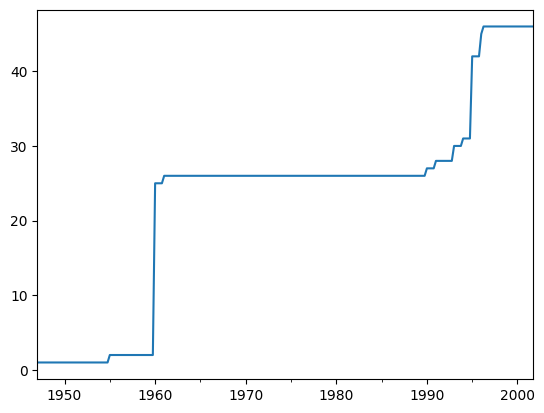

In [32]:
df_gdp['count'].plot()

<Axes: >

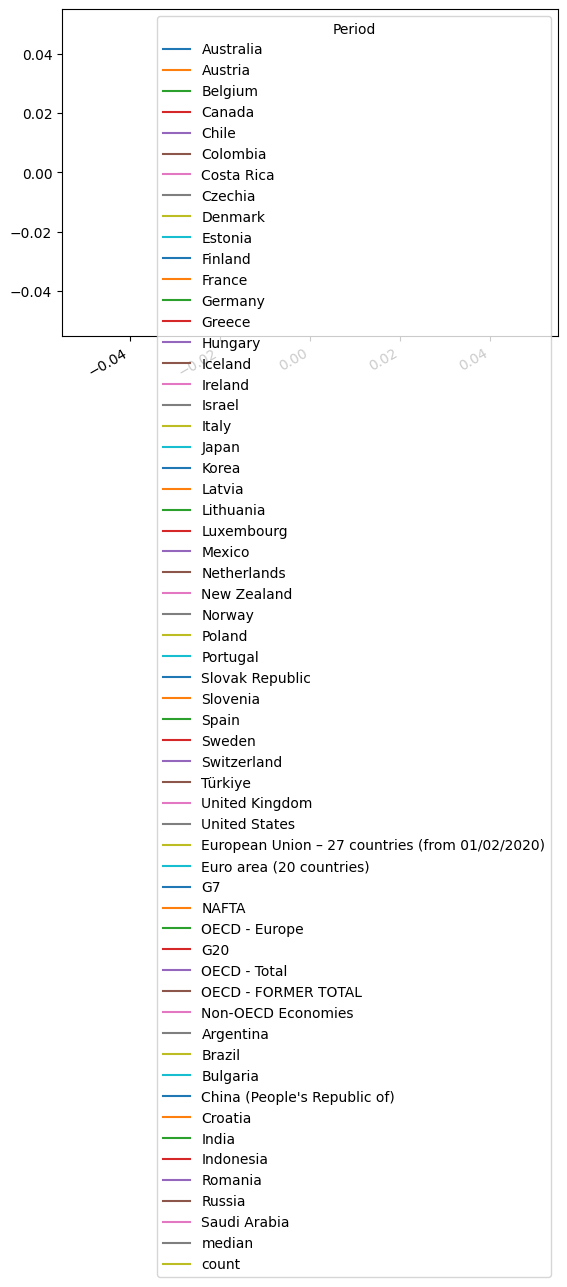

In [33]:
df_gdp = df_gdp.apply(pd.to_numeric, errors='coerce').dropna()
df_gdp.plot()

In [34]:
%load_ext autoreload
%autoreload 2

In [40]:
from seminartools.data import read_gdp_level

df = read_gdp_level()
df

ImportError: cannot import name 'read_gdp_level' from 'seminartools.data' (/Users/matthy/Desktop/IBEOR/third_year/seminar_forecasting/Bayesian/seminar-1/seminartools/data.py)